## Adaptive Exponential Integrate and Fire Model

Import useful libraries

In [1]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

Define simulation parameters

In [2]:
Sim_period = 5000
Sim_fs   = 100

Sim_dt   = 1/Sim_fs
Sim_t    = np.arange(0,Sim_period,Sim_dt)

Neuron Parameters

In [3]:
C     = 130     # pF - membrane capacitance
gL    = 1      # nS - leak conductance
EL    = -70.6   # mV - 
VT    = -50.6   # mV - 
dT    = 2       # mV - 
tauw  = 300     # ms - adaptation time-constant
a     = 30       # nS - subthreshold oscillation parameter
b     = 80.5    # pA - spike-triggered adaptation constants
vpeak = 20      # mV

taum = C/gL

v = np.ones(Sim_t.shape) * EL
w = np.zeros(Sim_t.shape)

In [4]:
print(a/gL)
print(taum/tauw)
print(taum/(4*tauw) * (1 - tauw/taum) ** 2)
# print()

30.0
0.43333333333333335
0.1852564102564102


Stimulation parameters

In [5]:
I_stim = 80 * 270

slope = fn.gen_slope(init_time=0,
                     end_time=200,
                     time_points=Sim_t)

# Sin
I1 = fn.gen_sin(freq=.005,
                time_points=Sim_t)

I = I_stim * I1

# AM
I1 = fn.gen_sin(freq=1.005,
                time_points=Sim_t)
I2 = fn.gen_sin(freq=1,
                time_points=Sim_t)

I = slope * I_stim * (.5*I1 + .5*I2)

# sin + chirp
# I1 = fn.gen_sin(freq=1,
#                 time_points=Sim_t)
# I2 = fn.gen_sin(freq=1.001,
#                 time_points=Sim_t)

# I3, freq = fn.gen_chirp(Chirp_init_freq=1, 
#                          Chirp_init_time=0, 
#                          Chirp_end_freq=1.01, 
#                          Chirp_end_time=Sim_t[-1], 
#                          time_points=Sim_t)
# I = I_stim * (I1 + I3)

# slope
slope = fn.gen_slope(init_time=0,
                     end_time=5,
                     time_points=Sim_t)

# sinusoid + chirp
I1 = fn.gen_sin(init_time=0,
                freq=1,
                phase=0,
                time_points=Sim_t)
I3, freq = fn.gen_chirp(Chirp_init_freq=1.001, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=1.02, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

# freq *= 1000  # change from kHz to Hz
# I = slope * (I_stim * (I1 + I3) * 1000)  # at 1032 we see some spikes at around 5 Hz

# Chirp stimulation
out, freq = fn.gen_chirp(Chirp_init_freq=.001, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=.02, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

# I      = I_stim * out  # pA

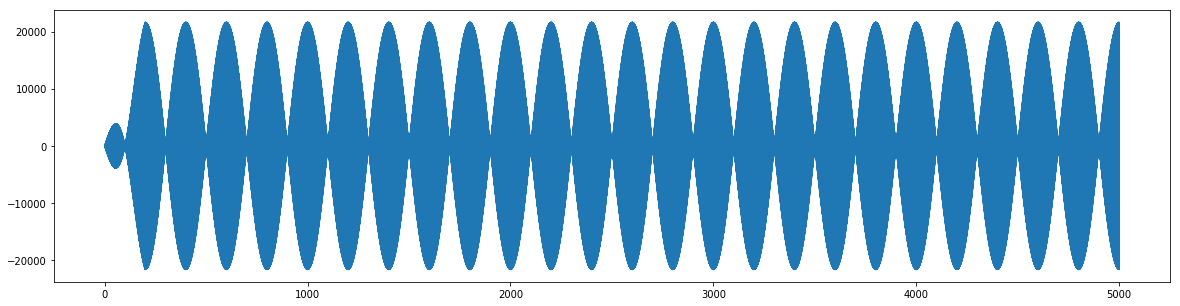

In [6]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, I)
plt.show()

In [7]:
for i in range(Sim_t.shape[0]-1):
    
    f = -gL * (v[i] - EL) + gL * dT * np.exp((v[i] - VT)/dT)
    dvdt = (f - w[i] + I[i]) / C
    v[i+1] = v[i] + dvdt  * Sim_dt
    
    dwdt = (a * (v[i] - EL) - w[i]) / tauw
    w[i+1] = w[i] + dwdt * Sim_dt
    
    if v[i+1] > vpeak:
        
        v[i] = vpeak
        
        v[i+1] = EL        # phasic spiking and post-inhibitory rebound
#         v(i+1) = VT + 5  # tonic bursting
#         v(i+1) = VT + 4  # phasic bursting
        
        w[i+1] = w[i+1] + b

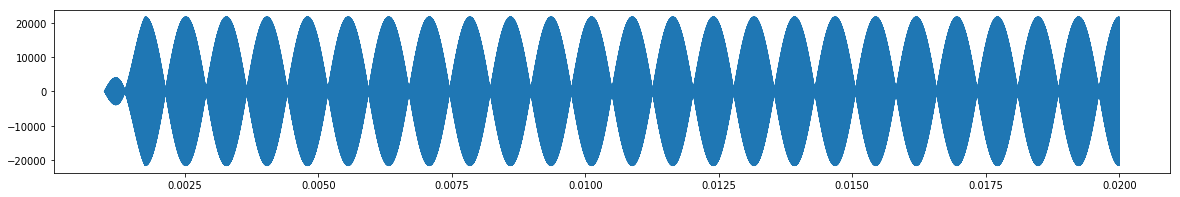

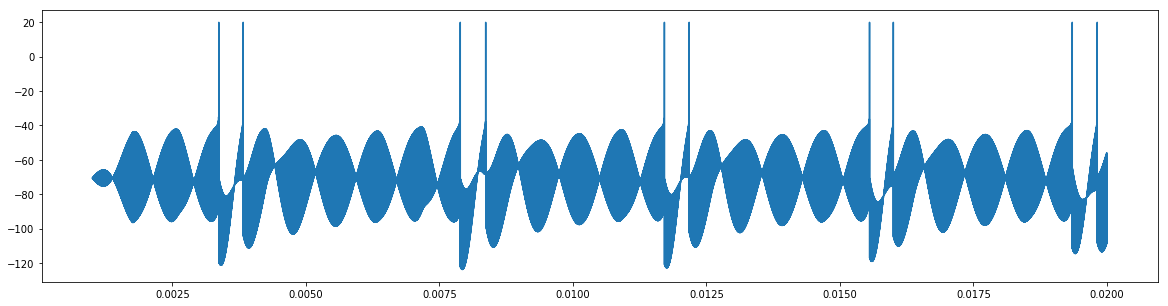

In [8]:
plt.figure(figsize=(20,3))
plt.plot(freq, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(freq, v)
plt.show()

## Save figures for paper

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(freq * 1000, I)
plt.xlabel('frequency (Hz)')
plt.ylabel('Injected Current (pA)')
plt.grid()
# plt.savefig('D:\TUM\Semester 2 - Holidays\Research project\Project\Erratum\Figures\Paper Figures\First Draft\ZAP\InputZAP.png')
plt.show()

plt.figure(figsize=(10,3))
plt.xlabel('frequency (Hz)')
plt.ylabel('Membrane Potential (mV)')
plt.plot(freq * 1000, v)
plt.grid()
# plt.savefig('D:\TUM\Semester 2 - Holidays\Research project\Project\Erratum\Figures\Paper Figures\First Draft\ZAP\AdExpZAP.png')
plt.show()

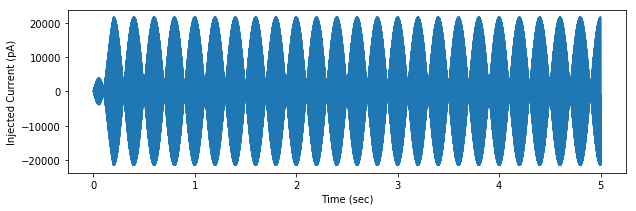

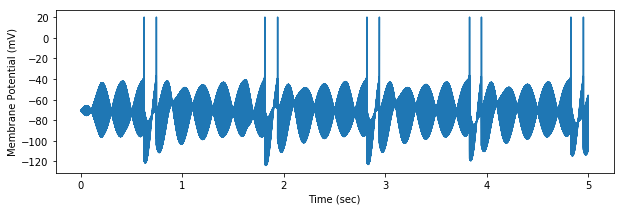

In [126]:
plt.figure(figsize=(10,3))
plt.plot(Sim_t / 1000, I)
plt.xlabel('Time (sec)')
plt.ylabel('Injected Current (pA)')
plt.savefig('../Figures/First_Draft/AM_Sinusoid/AdExp_Input_AM_5.png')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(Sim_t / 1000, v)
plt.xlabel('Time (sec)')
plt.ylabel('Membrane Potential (mV)')
plt.savefig('../Figures/First_Draft/AM_Sinusoid/AdExp_response_AM_5.png')
plt.show()